In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3

#  `bom.movie_gross.csv`

In [2]:
bom = pd.read_csv('../data/bom.movie_gross.csv.gz')
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [3]:
# Doesn't seem like a ton of redundancy. Offhand, only see "Fox" and "FoxS" as possible duplicates.
# Maybe can do something interesting with Levenshtein distance to find other possible duplicates? https://stackoverflow.com/questions/60287535/rename-row-values-that-have-similar-names-in-a-dataframe 
# Or this: https://pypi.org/project/fuzzywuzzy/


bom["studio"].value_counts().head(20)

IFC       166
Uni.      147
WB        140
Magn.     136
Fox       136
SPC       123
Sony      110
BV        106
LGF       103
Par.      101
Eros       89
Wein.      77
CL         74
Strand     68
FoxS       67
RAtt.      66
KL         62
Focus      60
WGUSA      58
CJ         56
Name: studio, dtype: int64

In [4]:
# Data seems to only be for 2010-2018?
print(bom["year"].max())
print(bom["year"].min())

2018
2010


In [5]:
# Presumably worth thinking about spread and skewness of the data, but I'm too lazy for that rn
bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# `rt.movies_info.tsv.gz`

In [6]:
rt_info = pd.read_csv('../data/rt.movie_info.tsv.gz', sep='\t')
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
rt_info.tail()
# No names of movies, just IDs

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [8]:
# Converting dates into datetime objects
rt_info['theater_date'] = pd.to_datetime(rt_info['theater_date'])
rt_info['dvd_date'] = pd.to_datetime(rt_info['dvd_date'])
rt_info['theater_date'].describe()

<ipython-input-8-3ff3b2056961>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  rt_info['theater_date'].describe()


count                    1201
unique                   1025
top       1987-01-01 00:00:00
freq                        8
first     1921-01-01 00:00:00
last      2018-10-19 00:00:00
Name: theater_date, dtype: object

theater_date
1.0     AxesSubplot(0.125,0.125;0.775x0.755)
2.0     AxesSubplot(0.125,0.125;0.775x0.755)
3.0     AxesSubplot(0.125,0.125;0.775x0.755)
4.0     AxesSubplot(0.125,0.125;0.775x0.755)
5.0     AxesSubplot(0.125,0.125;0.775x0.755)
6.0     AxesSubplot(0.125,0.125;0.775x0.755)
7.0     AxesSubplot(0.125,0.125;0.775x0.755)
8.0     AxesSubplot(0.125,0.125;0.775x0.755)
9.0     AxesSubplot(0.125,0.125;0.775x0.755)
10.0    AxesSubplot(0.125,0.125;0.775x0.755)
11.0    AxesSubplot(0.125,0.125;0.775x0.755)
12.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

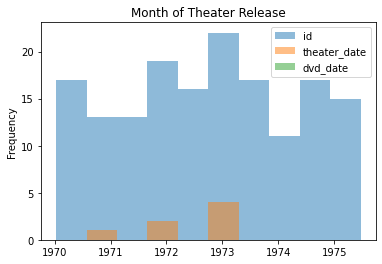

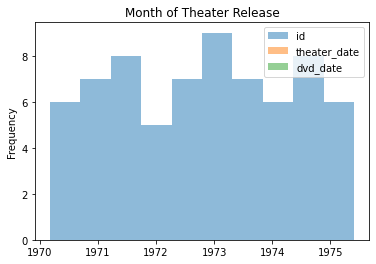

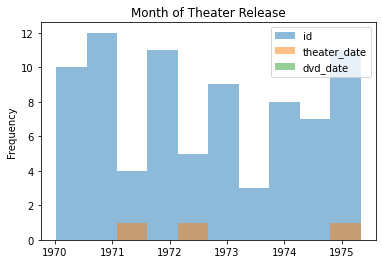

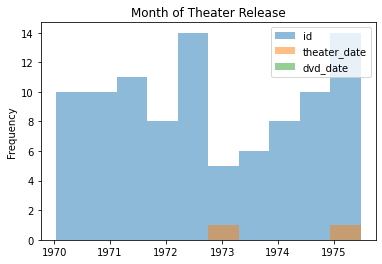

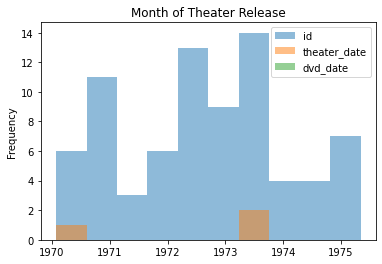

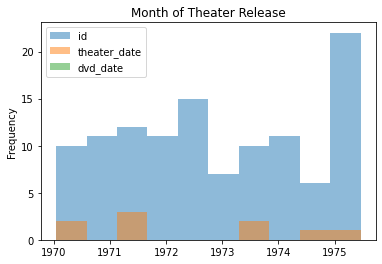

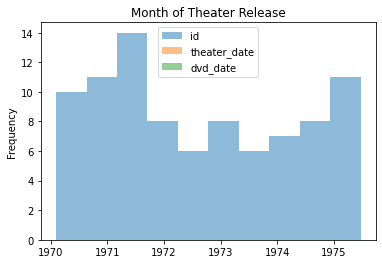

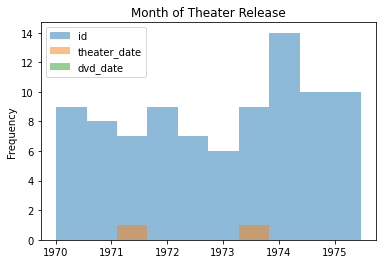

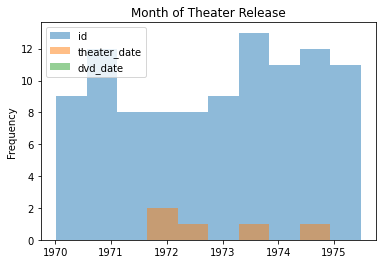

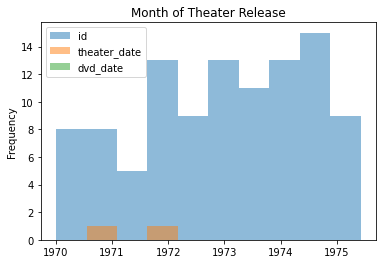

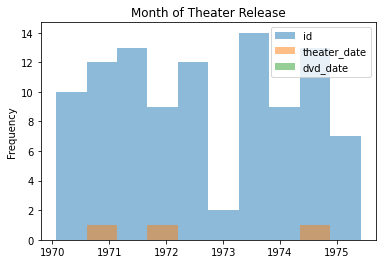

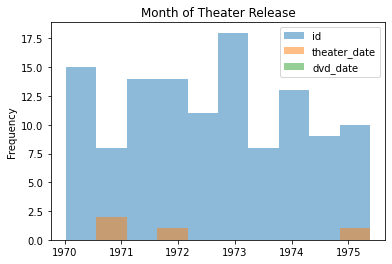

In [53]:
rt_info.groupby(rt_info['theater_date'].dt.month).plot(kind='hist', alpha=0.5, legend=True, title='Month of Theater Release')

In [9]:
rt_info['box_office'].value_counts()

200,000       2
20,900,803    2
32,000,000    2
600,000       2
24,967,943    1
             ..
14,260,193    1
8,888,355     1
64,209,101    1
38,120,554    1
292,923       1
Name: box_office, Length: 336, dtype: int64

# `rt.reviews.tsv`

In [10]:
rt_reviews = pd.read_csv('../data/rt.reviews.tsv.gz', sep='\t', encoding='latin-1')
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [11]:
# Many more entries than we have IDs
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


# `tmdb.movies.csv`

In [12]:
tmdb_movies = pd.read_csv('../data/tmdb.movies.csv.gz')
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [13]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# `tn.movies_budgets.csv`

In [14]:
tn_movie_budgets = pd.read_csv('../data/tn.movie_budgets.csv.gz')
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
tn_movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# 'im.db

In [16]:
conn = sqlite3.connect('../data/im.db/im.db')
pd.read_sql('SELECT name FROM sqlite_master WHERE type="table"', conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [17]:
imdb_movie_basics = pd.read_sql('SELECT * FROM movie_basics', conn)
imdb_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [18]:
imdb_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
imdb_directors = pd.read_sql('SELECT * FROM directors', conn)
imdb_directors.value_counts()

movie_id   person_id
tt2249786  nm4630460    52
           nm1667641    52
           nm3952326    52
           nm3911770    52
           nm3863962    52
                        ..
tt3835080  nm0957772     1
tt3835110  nm7064225     1
tt7083156  nm1962933     1
tt3835134  nm7775933     1
tt4105968  nm1297226     1
Length: 163535, dtype: int64

In [20]:
imdb_known_for = pd.read_sql('SELECT * FROM known_for', conn)
imdb_known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [21]:
imdb_persons = pd.read_sql('SELECT * FROM persons', conn)
imdb_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [48]:
pd.read_sql("""
SELECT primary_name, COUNT(primary_name) AS num_movies 
FROM principals 
JOIN persons
USING(person_id)
WHERE (category = 'actor' OR category = 'actress') AND characters IS NOT NULL 
GROUP BY person_id
HAVING num_movies > 10
ORDER BY num_movies DESC


            
            

            
            """, conn) 

,primary_name,num_movies
0,Eric Roberts,143
1,Brahmanandam,69
2,Tom Sizemore,69
3,Seiji Nakamitsu,67
4,Michael Madsen,63
...,...,...
1856,Denzel Washington,11
1857,John Travolta,11
1858,Will Smith,11
1859,Parker Posey,11
